In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score  
import matplotlib.pyplot as plt  

## Over Sampling: Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = dftop.drop('FraudFound_P',axis=1)
y = dftop['FraudFound_P']

# Division Between Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create an SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the Training Set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Model Selection with For Loop (Manual Approach)

In [85]:
X = dftop.drop('FraudFound_P',axis=1)
y = dftop['FraudFound_P']

# Split between training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

# List of models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=700, solver='lbfgs', penalty='l2', class_weight=None )),
    ('Support Vector Classifier', SVC(max_iter=1000, probability=True)),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10)),
    ('Random Forest', RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=10, bootstrap=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9, weights='uniform', leaf_size=30, p=2)),
    ('Gaussian NB', GaussianNB(var_smoothing=4.0)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=700, learning_rate=0.01, max_depth=4, min_samples_split=10, min_samples_leaf=5)),
    ('XGB Boost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=500, learning_rate=0.01, max_depth=4)),
    ('AdaBoost Classifier', AdaBoostClassifier(n_estimators=300, learning_rate=0.1))
]

results = []

for name, model in models:
    # Train the model on the oversampled data
    model.fit(X_resampled, y_resampled)
    
    # Make predictions on both training and test sets 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train AUC': train_auc,
        'Test AUC': test_auc,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
      
    })

results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Precision,Test Precision,Train Recall,Test Recall
0,Logistic Regression,0.940059,0.940337,0.812570,0.805785,0.000000,0.000000,0.000000,0.000000
1,Support Vector Classifier,0.940059,0.940337,0.535700,0.520029,0.000000,0.000000,0.000000,0.000000
2,Decision Tree Classifier,0.942283,0.942067,0.827227,0.813891,0.961538,1.000000,0.038640,0.028986
3,Random Forest,0.940059,0.940337,0.832096,0.808197,0.000000,0.000000,0.000000,0.000000
4,K-Nearest Neighbors,0.940986,0.939256,0.892934,0.666155,0.777778,0.000000,0.021638,0.000000
5,Gaussian NB,0.940059,0.940337,0.579222,0.598482,0.000000,0.000000,0.000000,0.000000
6,Gradient Boosting Classifier,0.942931,0.941850,0.870801,0.825017,0.918919,0.733333,0.052550,0.039855
7,XGB Boost,0.942283,0.942067,0.849612,0.826774,0.961538,1.000000,0.038640,0.028986
8,AdaBoost Classifier,0.936076,0.936879,0.815987,0.806403,0.135593,0.166667,0.012365,0.014493


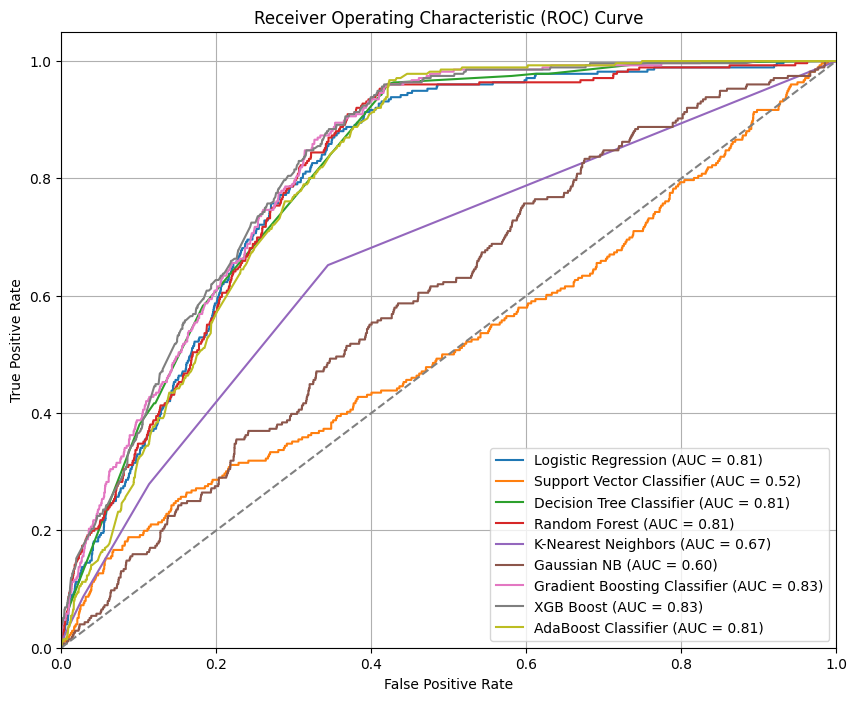

In [87]:
plt.figure(figsize=(10, 8))

# Iterate over each model in the `models` list
for name, model in models:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Model Selection with PyCaret

In [49]:
pip install --upgrade pandas dask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.6 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: dask
    Found existing installation: dask 2.30.0
    Uninstalling dask-2.30.0:
      Successfully uninstalled dask-2.30.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.11.0 requires dask==2023.11.0, but you have dask 2024.7.0 which is incompatible.
dataprep 0.4.1 requires dask[array,dataframe,delayed]<3.0,>=2.25, but you have dask 2024.7.0 which is incompatible.
dataprep 0.4.1 requires flask<2.0.0,>=1.1.4, but you have flask 2.2.5 which is incompatible.
dataprep 0.4.1 requires ipywidgets<8.0,>=7.5, but you have ipywidgets 8.1.3 which is incompatible.
dataprep 0.4.1 requires jinja2<3.0,>=2.11, but you have jinja2 3.1.4 which is incompatible.
dataprep 0.4.1 requires pandas<2.0,>=1.1, but you have pandas 2.2.2 which is incompatible.
Note

In [50]:
from pycaret.classification import *

In [51]:
# Initialize the PyCaret environment
s=setup (dftop, 
         target="FraudFound_P", 
         train_size=.8, 
         preprocess = False, 
         transformation = False,
         remove_multicollinearity=True, 
         multicollinearity_threshold = 0.9, 
         feature_selection = True,
         fix_imbalance = True)

# Compare multiple models and select the best one  
best_model = compare_models () 

,Description,Value
0,Session id,6380
1,Target,FraudFound_P
2,Target type,Binary
3,Original data shape,"(15420, 43)"
4,Transformed data shape,"(15420, 43)"
5,Transformed train set shape,"(12336, 43)"
6,Transformed test set shape,"(3084, 43)"
7,Numeric features,42


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9404,0.8154,0.0190,0.6000,0.0366,0.0328,0.0957,0.1490
lightgbm,Light Gradient Boosting Machine,0.9403,0.8032,0.0407,0.5343,0.0748,0.0669,0.1324,0.5440
lr,Logistic Regression,0.9402,0.8009,0.0000,0.0000,0.0000,0.0000,0.0000,0.2410
ridge,Ridge Classifier,0.9402,0.7960,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
qda,Quadratic Discriminant Analysis,0.9402,0.5909,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
lda,Linear Discriminant Analysis,0.9376,0.7959,0.0284,0.3326,0.0515,0.0413,0.0787,0.0070
xgboost,Extreme Gradient Boosting,0.9376,0.7956,0.0475,0.3594,0.0833,0.0699,0.1113,0.0260
ada,Ada Boost Classifier,0.9352,0.8027,0.0149,0.1302,0.0267,0.0148,0.0247,0.0440
knn,K Neighbors Classifier,0.9350,0.6267,0.0136,0.1177,0.0241,0.0121,0.0202,0.0330


## GridSearchCV


### Perform a final GridSearch to optimize hyperparameters for the selected model 

In [95]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn

In [89]:
model = GradientBoostingClassifier()

# Scoring: List of metrics to obtain
scoring = ['accuracy', 'roc_auc']

In [91]:
# Let's review its parameters
model.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [97]:
params = {'n_estimators': [500, 700],# Number of Trees
          'learning_rate': [0.01, 0.05],
          'max_depth': [4, 10], # Maximum Depth of the Tree
         'min_samples_split': [10,20],
         'min_samples_leaf': [5, 10]} 


grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv= 3, #cross validation
                           scoring = scoring, 
                           refit = 'roc_auc',
                           verbose = 1 ) 


model_result = grid_search.fit(X_resampled, y_resampled)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [99]:
model_result.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=700)

In [29]:

print("Mejor score:", model_result.best_score_)

print("Mejores parametros:",model_result.best_params_)

print("Train Score:", model_result.score(X_train,y_train)) 
print("Test Score:", model_result.score(X_test,y_test))

y_pred=model_result.predict(X_train)
probs=model_result.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred))

model_result.score(X_test,y_test)
y_pred=model_result.predict(X_test)
probs=model_result.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred))

Mejor score: 0.8213077777702008
Mejores parametros: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 700}
Train Score: 0.8708006980539089
Test Score: 0.8250233216724971
Train AUC: 0.8708006980539089
Train Accuracy: 0.9429312581063554
Test AUC: 0.8250233216724971
Test Accuracy: 0.941850410722006
